## Plotting of cross-section graphs

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotting

In [2]:
use_liberation_fonts = True
if use_liberation_fonts:
    plt.rcParams.update({
        'font.family':'sans-serif',
        'font.sans-serif':['Liberation Sans'],
    })

In [3]:
# import CROSS-SECTION (cs) ASV
cs_asv = pd.read_csv('../data/output/valle_cs_2_asv.csv', delimiter=',')

In [4]:
# import CROSS-SECTION (cs) ALS
cs_als = pd.read_csv('../data/output/valle_cs_2_als.csv', delimiter=',')

In [5]:
# import CROSS-SECTION (cs) S2
cs_s2 = pd.read_csv('../data/output/valle_cs_2_s2.csv', delimiter=',')

In [6]:
# check
cs_asv

,ASV_m,ASV
0,0.000000,64.404235
1,0.312260,64.400614
2,0.624521,64.409531
3,0.936781,64.414829
4,1.249041,64.429275
...,...,...
502,156.754673,63.538188
503,157.066933,63.532335
504,157.379194,63.516226
505,157.691454,63.491816


In [7]:
# check
cs_als

,ALS_m,ALS
0,0.000000,64.320200
1,0.312260,64.344149
2,0.624521,64.381248
3,0.936781,64.356295
4,1.249041,64.340065
...,...,...
502,156.754673,63.597241
503,157.066933,63.755894
504,157.379194,63.410601
505,157.691454,63.309952


In [8]:
# check
cs_s2

,S2_m,S2
0,0.000000,63.153445
1,1.251519,63.153445
2,2.503039,63.422013
3,3.754558,63.422013
4,5.006078,62.963869
...,...,...
123,153.936895,62.797988
124,155.188415,62.331945
125,156.439934,62.331945
126,157.691454,62.331945


In [9]:
# rename S2 to SDB
cs_s2 = cs_s2.rename(columns={"S2": "SDB"})

In [10]:
# replace "None" to nan
cs_asv = cs_asv.replace('None', np.nan)
cs_als = cs_als.replace('None', np.nan)
cs_s2 = cs_s2.replace('None', np.nan)

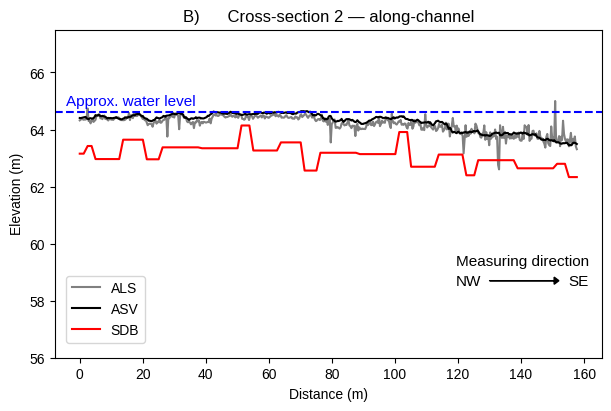

In [13]:
# plot
fig, ax = plotting.init_plot(figsize=(6,4))
ax.set_title('B)      Cross-section 2 — along-channel')

cs_als.plot(x='ALS_m', color = 'grey', linestyle="solid", ax=ax)
cs_asv.plot(x='ASV_m', color='black',  linestyle="solid", ax=ax)
cs_s2.plot(x='S2_m', color = '#FF0000', linestyle="solid", ax=ax)
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")
#ax.axis('equal')
ax.set_ylim(56,67.5) # 9.6,18.3 for Nuorgam, 56,67.5 for Utsjoki
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.177, 0.271)) # 0.977, 0.971 for Nuorgam, 0.177, 0.271 for Utsjoki
#leg.get_frame().set_edgecolor('none')
fig.text(0.75, 0.35, 'Measuring direction', fontsize=11) # Utsjoki
fig.text(0.75, 0.30, 'NW', fontsize=11) # Utsjoki start point of the compass 
fig.text(0.937, 0.30, 'SE', fontsize=11) # Utsjoki end point of the compass
#fig.text(0.25, 0.85, 'Measuring direction', fontsize=11) # Nuorgam
#fig.text(0.25, 0.80, 'SW', fontsize=11) # Nuorgam start point of the compass 
#fig.text(0.44, 0.80, 'NE', fontsize=11) # Nuorgam end point of the compass
#fig.text(0.7, 0.5, 'Approx. water level', color='blue', fontsize=11) # Nuorgam water level text
fig.text(0.1, 0.75, 'Approx. water level', color='blue', fontsize=11) # Utsjoki water level text for cs 1-2
#fig.text(0.77, 0.77, 'Approx. water level', color='blue', fontsize=11) # Utsjoki water level text for cs 3
ax.arrow(130, 58.7, 22, 0, 
         length_includes_head=True, head_width=0.25, head_length=1.5, 
         color='black'
        )
ax.axhline(y=64.6, color='#0000FF', linestyle='--') #y=13.4 for Nuorgam, y=64.6 for Utsjoki
#B37700

In [14]:
# save as png
#plotting.save_plot(fig=fig, name='valle_cs_2_v5', dpi=600)